In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy


SOI = pd.read_csv('southern_osc.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
SOI = SOI.reset_index()
def padYear(Date):
    i = Date.find('-')
    if int(Date[-2:]) > 22:
        return Date[:i+1]+'19'+Date[i+1:]
    else: 
        return Date[:i+1]+'20'+Date[i+1:]
    
SOI.Date = SOI.Date.apply(padYear)

In [2]:
SOI.Date = pd.to_datetime(SOI.Date, format='%b-%Y')

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional in

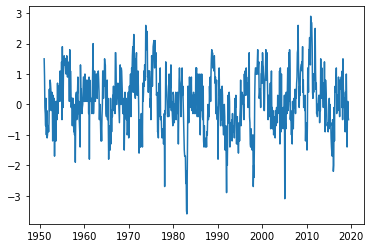

In [3]:
plt.plot(SOI.Date, SOI.T_i)

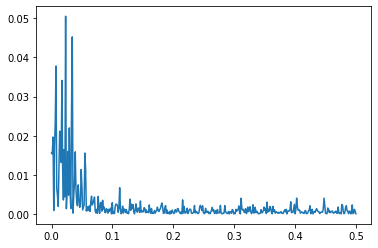

In [4]:
import scipy.signal
f, s = scipy.signal.periodogram(SOI.T_i, 
                                detrend=False,
                                scaling='spectrum')
plt.plot(f,s)
# plt.plot(f[1:],(s)[1:])



In [5]:
T = SOI.Date.iloc[-1] - SOI.Date.iloc[0]
f[np.argmax(s)]*T

Timedelta('577 days 13:57:22.335766424')

In [6]:
4*365/T.days

0.058428045461821676

In [7]:
f[np.argmax(s)]*2

0.046228710462287104

Timedelta('878 days 11:37:30')

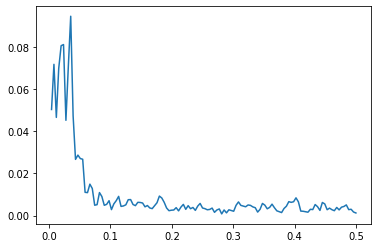

In [8]:
import scipy.signal
f, s = scipy.signal.welch(SOI.T_i, 
                                detrend='constant',
                                scaling='spectrum')
plt.plot(f[1:],s[1:])
# plt.plot(f[1:],np.log(s)[1:])
f[np.argmax(s)]*T

In [35]:
878/365

2.4054794520547946